In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("datasets/vgsales.csv")


In [31]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [32]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Looking at the data and looking for missing data

In [34]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Filling missing data.

In [35]:
df["Year"] = df["Year"].fillna(0)

In [36]:
df["Publisher"] = df["Publisher"].fillna(value="Small Team")

Data is filled and ready to work with.

In [37]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [38]:
df["Genre"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16598 entries, 0 to 16597
Series name: Genre
Non-Null Count  Dtype 
--------------  ----- 
16598 non-null  object
dtypes: object(1)
memory usage: 129.8+ KB


Plot the data for top 12 of the most sold Genres of Games.

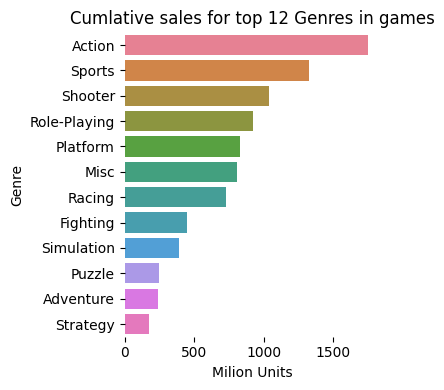

In [39]:
genre_totals = df.groupby("Genre")[["Global_Sales"]].sum().sort_values("Global_Sales", ascending=False)
plt.figure(figsize=(4,4))

sns.barplot(data=genre_totals,x="Global_Sales", y= "Genre" ,legend=False, hue="Genre")
plt.title("Cumlative sales for top 12 Genres in games")
plt.xlabel("Milion Units")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Visualise top 10 companies with the most games sold.

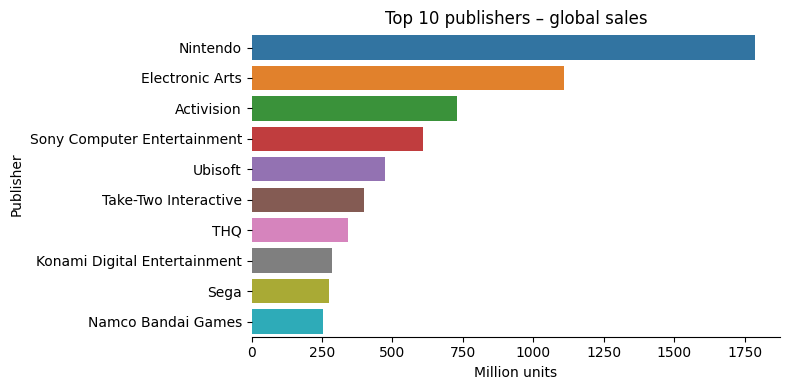

In [40]:
pub_totals = (df.groupby("Publisher")[["Global_Sales"]]
                .sum()
                .sort_values(by="Global_Sales",ascending=False))

# 2. grab top 10 (or 20)
top10 = pub_totals.head(10)   # select top 10 Publishers

# 3. bar plot
plt.figure(figsize=(8,4))
sns.barplot(data=top10,
            x="Global_Sales",
            y="Publisher",
            hue="Publisher")   # 10 distinct colours

plt.title("Top 10 publishers – global sales")
plt.xlabel("Million units")
sns.despine(left=True)
plt.tight_layout()
plt.show()

Plotting top 10 years with the most games released.

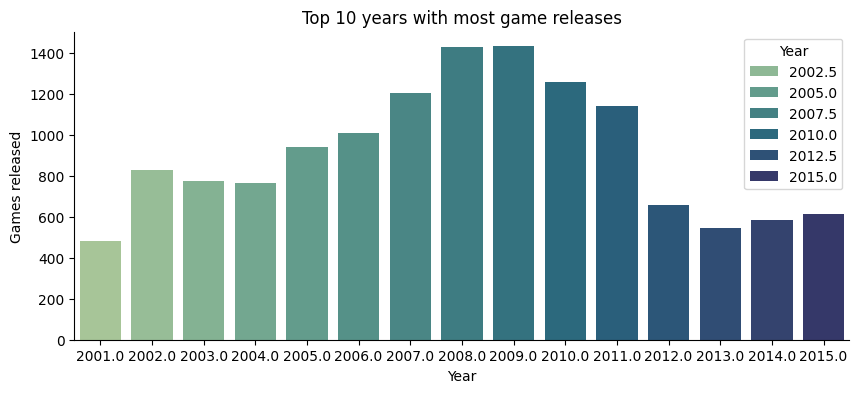

In [41]:
# 1. count releases per year
games_per_year = df.groupby("Year").size().reset_index(name="Count")

# 2. pick the 10 biggest years
top10_years = games_per_year.nlargest(15, "Count")

# 3. plot
plt.figure(figsize=(10,4))
sns.barplot(data=top10_years, x="Year", y="Count", hue="Year", palette="crest")
plt.title("Top 10 years with most game releases")
plt.xlabel("Year")
plt.ylabel("Games released")
sns.despine()
plt.show()

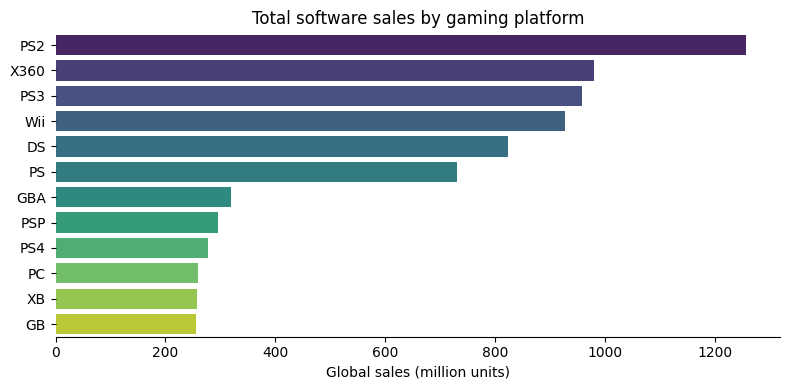

In [42]:
platform_sales = (df.groupby("Platform")["Global_Sales"]
                    .sum()
                    .sort_values(ascending=False))
top_plat = platform_sales.head(12)   # 12 biggest platforms
plt.figure(figsize=(8, 4))
sns.barplot(x=top_plat.values, y=top_plat.index, palette="viridis", hue = top_plat.index)
plt.title("Total software sales by gaming platform")
plt.xlabel("Global sales (million units)")
plt.ylabel(None)
sns.despine(left=True)
plt.tight_layout()
plt.show()
